In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'ex1data1.txt',
 'ex1data2.txt',
 'Gredient descent.ipynb',
 'Linear Regression using gredient descent.ipynb',
 'Linear Regression using Least Squared Method.ipynb',
 'Linear Regression.ipynb',
 'Multi-variable Linear Regression.ipynb',
 'Untitled.ipynb']

# Import data

In [4]:
data = pd.read_csv('ex1data1.txt')

In [5]:
data = pd.DataFrame(data=np.array(data),columns=['X','y'])

In [6]:
data

,X,y
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [41]:
X = np.array(data['X'])
y = np.array(data['y'])

In [42]:
print(X.shape)
print(y.shape)

(96,)
(96,)


# Vizualising the data

In [9]:
def plot_graph(X,y):
    plt.scatter(X,y,c='r',marker='.')
    plt.xlim(4,25)
    plt.ylim(-5,25)
    plt.xlabel('Population of city in 10,000s')
    plt.ylabel('Profit in $10,000s')

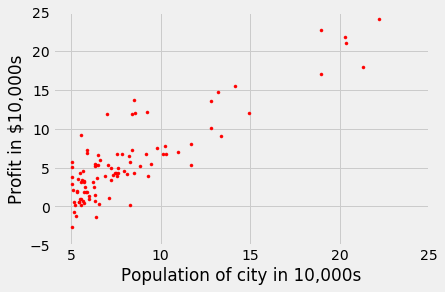

In [10]:
plot_graph(X,y)

# Hypothesis function

In [43]:
def hypothesis(X,theta):
    hx = np.dot(X,theta)
    return hx

# Cost-function

 

In [44]:
def costfunction(theta,X,y):
    
    m,n = X.shape
    theta = theta.reshape((n,1))
    m = len(X)
    hx = hypothesis(X,theta)
    j = (1/(2*m))*np.sum((hx-y)**2)
    return j

# Gradient Descent for num_iteration

In [45]:
def gradient(X,y,theta,num_iter,alpha):
    
    m,n = X.shape
    
    for i in range(num_iter):
        hx = hypothesis(X,theta)
        theta = theta - (alpha/m)*(np.dot(X.T,(hx-y)))
    
    return theta

#  Gradient for optimization function

In [46]:
def gradient_opt(theta,X,y):
    
    m,n = X.shape
    theta = theta.reshape((n,1))
    hx = hypothesis(X,theta)
    theta = (1/m)*(np.dot(X.T,(hx-y)))
    
    return theta

# Prediction

In [47]:
def predict(X,theta):
    pred = np.dot(X,theta)
    return pred

# Main function

# Gradient using no of iteration

In [48]:
m = len(X)
X = np.c_[np.ones((m,1)),X]
y = y.reshape((len(y),1))

In [49]:
print(X.shape)
print(y.shape)
m,n = X.shape

(96, 2)
(96, 1)


In [50]:
num_iter = 1500
alpha = 0.01
initial_theta = np.zeros((n,1))

In [51]:
theta = gradient(X,y,initial_theta,num_iter,alpha)
theta

array([[-3.92643901],
       [ 1.1849957 ]])

In [52]:
pred = predict(X,theta)
print("Cost: ",costfunction(theta,X,y))

Cost:  3.466993148044392


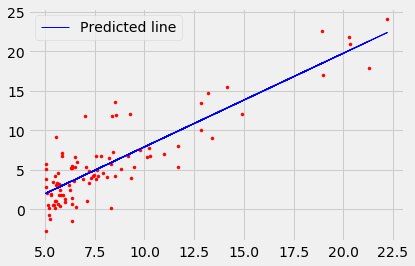

In [21]:
plt.scatter(X[:,1],y,c='r',marker='.')
plt.plot(X[:,1],pred,c='b',linewidth=1,label='Predicted line')
plt.legend()

# Gradient using optimization function

In [22]:
import scipy.optimize as opt
initial_theta = np.zeros((n,1)).flatten()

In [23]:
theta = opt.fmin_tnc(func=costfunction,x0=initial_theta,fprime=gradient_opt,args=(X,y))

In [24]:
theta_opt = theta[0]
theta_opt

array([-4.21150377,  1.21354723])

In [38]:
pred = predict(X,theta_opt)
print("Cost :",costfunction(theta_opt,X,y))

Cost : 3.4595819031580097


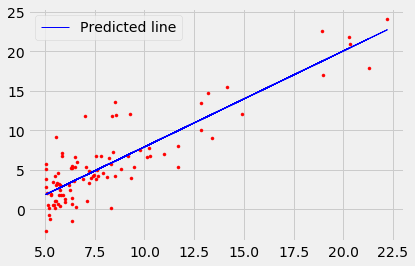

In [26]:
plt.scatter(X[:,1],y,c='r',marker='.')
plt.plot(X[:,1],pred,c='b',linewidth=1,label='Predicted line')
plt.legend()

# Prediction using Sklearn library

In [27]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print(linreg.intercept_)
print(linreg.coef_)
theta_sk = np.c_[linreg.intercept_,linreg.coef_[:,1]].reshape((n,1))
print(theta_sk)

[-4.21150401]
[[0.         1.21354725]]
[[-4.21150401]
 [ 1.21354725]]


In [37]:
y_pred = linreg.predict(X)
print("Cost : ",costfunction(theta_sk,X,y))

Cost :  3.4595819031580044


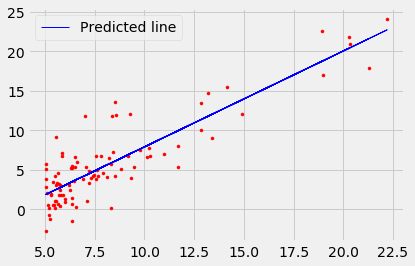

In [30]:
plt.scatter(X[:,1],y,c='r',marker='.')
plt.plot(X[:,1],y_pred,c='b',linewidth=1,label='Predicted line')
plt.legend()

# MultiVariable Linear Regression

In [53]:
os.listdir()

['.ipynb_checkpoints',
 'ex1data1.txt',
 'ex1data2.txt',
 'Gredient descent.ipynb',
 'Linear Regression using gredient descent.ipynb',
 'Linear Regression using Least Squared Method.ipynb',
 'Linear Regression.ipynb',
 'Multi-variable Linear Regression.ipynb',
 'Untitled.ipynb']

In [55]:
data2 = pd.read_csv('ex1data2.txt')

In [62]:
df = pd.DataFrame(np.array(data2),columns=['Area','No.of bedrooms','Price'])

In [65]:
df.head()

,Area,No.of bedrooms,Price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [101]:
X = np.array(df[['Area','No.of bedrooms']])
y = np.array(df['Price'])

In [102]:
print(X.shape)
print(y.shape)

(46, 2)
(46,)


Text(0, 0.5, 'Price($)')

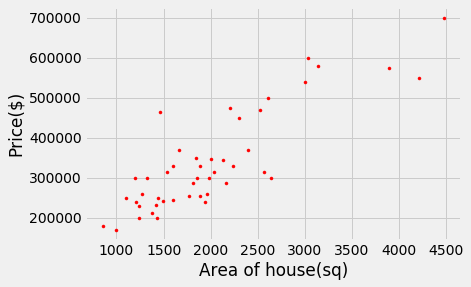

In [103]:
plt.scatter(X[:,0],y,c='r',marker='.')
plt.xlabel('Area of house(sq)')
plt.ylabel('Price($)')

In [97]:
def featurenormalize(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = np.divide(X-mean,std)
    return X_norm

In [104]:
X_norm = featurenormalize(X)

In [105]:
m = len(X)
X_norm = np.c_[np.ones((m,1)),X_norm]
y = y.reshape((len(y),1))

In [106]:
print(X_norm.shape)
print(y.shape)
m,n = X_norm.shape

(46, 3)
(46, 1)


In [120]:
num_iter = 400
alpha = 0.01
initial_theta = np.zeros((n,1))

In [121]:
theta = gradient(X_norm,y,initial_theta,num_iter,alpha)
theta

array([[333032.07465084],
       [100130.7408761 ],
       [  3699.66611303]])

In [122]:
pred = predict(X_norm,theta)
print("Cost: ",costfunction(theta,X_norm,y))

Cost:  2129135983.2744648


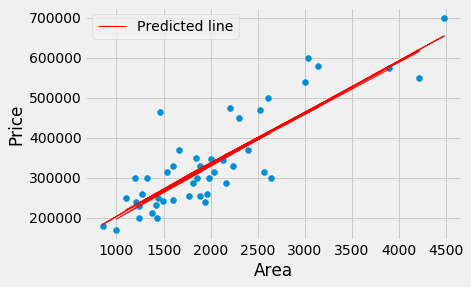

In [127]:
plt.scatter(X[:,0],y)
plt.plot(X[:,0],pred,c='r',linewidth=1,label='Predicted line')
plt.xlabel("Area")
plt.ylabel('Price')
plt.legend()

# Using Sklearn

In [128]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_norm, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
print(linreg.intercept_)
print(linreg.coef_)
theta_sk = np.c_[linreg.intercept_,linreg.coef_[:,1:]].reshape((n,1))
print(theta_sk)

[339119.45652174]
[[     0.         110248.92165868  -6226.22670553]]
[[339119.45652174]
 [110248.92165868]
 [ -6226.22670553]]


In [130]:
y_pred = linreg.predict(X_norm)
print("Cost : ",costfunction(theta_sk,X_norm,y))

Cost :  2066502781.7118063


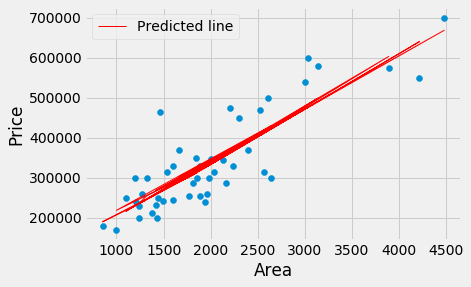

In [131]:
plt.scatter(X[:,0],y)
plt.plot(X[:,0],y_pred,c='r',linewidth=1,label='Predicted line')
plt.xlabel("Area")
plt.ylabel('Price')
plt.legend()

# Using optimization

In [132]:
import scipy.optimize as opt
initial_theta = np.zeros((n,1)).flatten()

In [133]:
theta = opt.fmin_tnc(func=costfunction,x0=initial_theta,fprime=gradient_opt,args=(X_norm,y))

In [134]:
theta_opt = theta[0]
theta_opt

array([339119.45640366, 110248.92165689,  -6226.22669227])

In [136]:
pred = predict(X_norm,theta_opt)
print("Cost :",costfunction(theta_opt,X_norm,y))

Cost : 2066502781.7118049


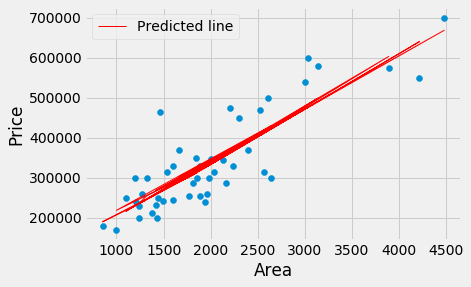

In [137]:
plt.scatter(X[:,0],y)
plt.plot(X[:,0],pred,c='r',linewidth=1,label='Predicted line')
plt.xlabel("Area")
plt.ylabel('Price')
plt.legend()